# Corporate Investment and Tax Rate Comaprison

[This blog post](http://behindthenumbers.ca/2018/11/21/corporate-tax-cuts-enrich-shareholders-not-competitiveness/) by Behind the Numbers piqued my interest. The author only delved into machinery and equipment investment in comparison to corporate tax rates, but I felt that the generally declining manufacturing base in North America may have had an influence here. I wanted to also include intellectual property investment in the analysis as well. The result is this notebook.

### Sources

* [OECD Stat](https://stats.oecd.org/index.aspx?DataSetCode=TABLE_II1#) for the corporate tax rate data

* [StatsCan](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3610010401) for the corporate investment data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
investment_data = pd.read_csv('data/investment.csv')
tax_data = pd.read_csv('data/tax_rates.csv')
investment_data.head()

,Reference period,Business gross fixed capital formation,Residential structures,"Non-residential structures, machinery and equipment",Non-residential structures,Machinery and equipment,Intellectual property products
0,Q1 2000,212829,67962,117067,60702,56554,23888
1,Q2 2000,214884,68434,116805,59038,57352,25820
2,Q3 2000,217298,71454,115836,57418,57563,26906
3,Q4 2000,217890,72796,114254,57940,55979,28230
4,Q1 2001,222632,74929,115335,60415,55347,30010


In [3]:
tax_data.head()

,Year,Corporate Tax Rate
0,2000,29.12
1,2001,28.12
2,2002,26.12
3,2003,24.12
4,2004,22.12


## Data Manipulation

In [4]:
investment_data['Year'] = investment_data['Reference period'].apply(lambda s: str(s)[3:])
investment_data.tail()

,Reference period,Business gross fixed capital formation,Residential structures,"Non-residential structures, machinery and equipment",Non-residential structures,Machinery and equipment,Intellectual property products,Year
69,Q2 2017,326250,127260,171085,95344,73764,29260,2017
70,Q3 2017,329279,127233,173570,97402,74058,29912,2017
71,Q4 2017,336996,131321,176943,98354,76609,30133,2017
72,Q1 2018,338937,127740,181779,100303,79576,31161,2018
73,Q2 2018,340190,128092,182622,100852,79846,31237,2018


In [5]:
tax_data['Year'] = tax_data['Year'].apply(lambda s: str(s))
tax_data['Corporate Tax Rate'] = tax_data['Corporate Tax Rate'].apply(lambda r: r/100)

In [6]:
data = pd.merge(investment_data, tax_data, how='left', on=['Year'])

In [7]:
data['Machinery and Equipment Investment'] = data['Machinery and equipment'] / data['Business gross fixed capital formation']
data['Intellectual Property Investment'] = data['Intellectual property products'] / data['Business gross fixed capital formation']
data['Building Investment'] = data['Non-residential structures'] / data['Business gross fixed capital formation']

data = data.set_index('Reference period')
data.head()

,Business gross fixed capital formation,Residential structures,"Non-residential structures, machinery and equipment",Non-residential structures,Machinery and equipment,Intellectual property products,Year,Corporate Tax Rate,Machinery and Equipment Investment,Intellectual Property Investment,Building Investment
Reference period,,,,,,,,,,,
Q1 2000,212829,67962,117067,60702,56554,23888,2000,0.2912,0.265725,0.112240,0.285215
Q2 2000,214884,68434,116805,59038,57352,25820,2000,0.2912,0.266897,0.120158,0.274744
Q3 2000,217298,71454,115836,57418,57563,26906,2000,0.2912,0.264903,0.123821,0.264236
Q4 2000,217890,72796,114254,57940,55979,28230,2000,0.2912,0.256914,0.129561,0.265914
Q1 2001,222632,74929,115335,60415,55347,30010,2001,0.2812,0.248603,0.134796,0.271367


## Analysis

AttributeError: Unknown property styke

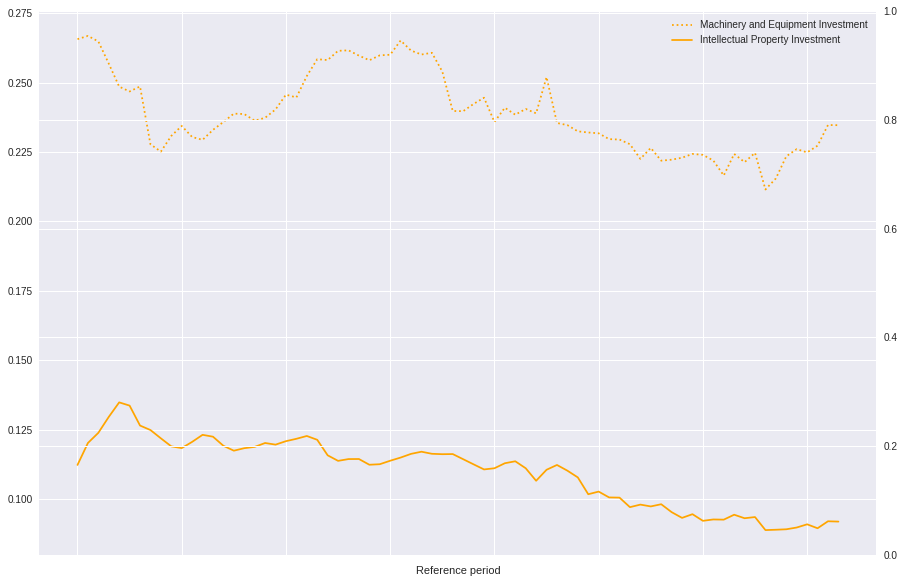

In [8]:
# Set up plots
fig = plt.figure(figsize=(15,10))
plt.style.use('seaborn')
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# Plot out data
data.plot(ax=ax1, y='Machinery and Equipment Investment', color='orange', style=[':'])
data.plot(ax=ax1, y='Intellectual Property Investment', color='orange')
data.plot(ax=ax1, y='Building Investment', color='orange', styke=['--'])
data.plot(ax=ax2, y='Corporate Tax Rate', color='tomato')

# Format labeling and look
ax1.set_ylabel('Proportion of Total Corporate Investment (%)')
ax2.set_ylabel('Corporate Tax Rate (%)')
ax1.set_ybound(0, 0.3)
ax2.set_ybound(0.1,0.30)
ax2.legend(loc=(0.75,0.90))
ax1.set_xticklabels(minor=False, labels=data.index.values[::9])
plt.title('Canadian Corporate Tax Rate Compared to Business Investment')

# Save plot to image
plt.savefig('corporate_investment.jpg')